In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv("Netflix Dataset.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df["date_added"]=pd.to_datetime(df['date_added'])

In [6]:
# delete null values

df.dropna(subset = ['date_added'], inplace = True)

In [7]:
df['director'] = df.groupby(['cast', 'listed_in'])['director'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown')
df.fillna({'director': 'Unknown'}, inplace=True)
df.dropna(subset = ['cast'], inplace = True)

In [8]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         676
date_added        0
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [9]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [10]:
df1 = df[df['type'] == "Movie"].copy()
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...


In [11]:
df1['country'].mode()[0]

'United States'

In [12]:
df1['country'].fillna(df1['country'].mode()[0], inplace = True)
df1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          2
duration        3
listed_in       0
description     0
dtype: int64

In [13]:
df1['duration'].unique()

array(['91 min', '125 min', '104 min', '127 min', '94 min', '161 min',
       '61 min', '166 min', '147 min', '103 min', '97 min', '106 min',
       '111 min', '110 min', '105 min', '96 min', '124 min', '116 min',
       '98 min', '115 min', '122 min', '99 min', '88 min', '100 min',
       '102 min', '93 min', '95 min', '85 min', '83 min', '113 min',
       '13 min', '182 min', '48 min', '145 min', '87 min', '90 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '92 min',
       '135 min', '136 min', '165 min', '150 min', '133 min', '84 min',
       '140 min', '64 min', '59 min', '139 min', '148 min', '189 min',
       '141 min', '130 min', '138 min', '132 min', '123 min', '65 min',
       '68 min', '67 min', '66 min', '62 min', '69 min', '70 min',
       '74

In [14]:
df1['duration_min'] = pd.to_numeric(df1['duration'].str.extract(r'(\d+)')[0], errors='coerce')
df1.drop(columns=['duration'], inplace=True)  
df1['duration_min'].fillna(df1['duration_min'].mean(), inplace=True)  
df1['duration_min'] = df1['duration_min'].astype(int)  


In [15]:
df1['rating'].fillna(df1['rating'].mode()[0], inplace = True)

In [16]:
df1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
listed_in       0
description     0
duration_min    0
dtype: int64

In [17]:
df1.shape

(5656, 12)

In [18]:
df["type"].unique()

array(['TV Show', 'Movie'], dtype=object)

In [19]:
df2 = df[df['type'] == "TV Show"].copy()
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [20]:
df2.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         301
date_added        0
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [21]:
# fill null values with mode
df2['country'].fillna(df2['country'].mode()[0], inplace = True)
df2['rating'].fillna(df2['rating'].mode()[0], inplace = True)

In [22]:
df2['seasons'] = pd.to_numeric(df2['duration'].str.extract(r'(\d+)')[0], errors='coerce')
df2.drop(columns=['duration'], inplace=True)  
df2['seasons'].fillna(df2['seasons'].mode()[0], inplace=True)  
df2['seasons'] = df2['seasons'].astype(int)


In [23]:
df2.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
listed_in       0
description     0
seasons         0
dtype: int64

In [24]:
df3 = pd.concat([df1, df2], ignore_index=True)

df3['duration_min'].fillna(0, inplace=True)
df3['seasons'].fillna(0, inplace=True)


df3.isnull().sum()



show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
listed_in       0
description     0
duration_min    0
seasons         0
dtype: int64

In [25]:
df3['cast'][0]

'Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr'

In [26]:
df3['cast'] = df3['cast'].str.split(', ')
df3 = df3.explode('cast')
df3 = df3.reset_index(drop=True)

df3.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_min,seasons
0,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Vanessa Hudgens,United States,2021-09-24,2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,0.0
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Kimiko Glenn,United States,2021-09-24,2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,0.0
2,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",James Marsden,United States,2021-09-24,2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,0.0
3,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Sofia Carson,United States,2021-09-24,2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,0.0
4,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Liza Koshy,United States,2021-09-24,2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,0.0


In [27]:
df3.shape

(64057, 13)

In [28]:
df3['rating'].value_counts()

rating
TV-MA       22572
TV-14       14988
R            7570
TV-PG        4838
PG-13        4797
PG           2783
TV-Y7        2697
TV-Y         1795
TV-G         1055
NR            452
G             426
NC-17          29
TV-Y7-FV       27
UR             25
74 min          1
84 min          1
66 min          1
Name: count, dtype: int64

In [29]:
df3[df3['rating'].isin(['74 min', '84 min', '66 min'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_min,seasons
25665,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",101.0,0.0
26806,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,101.0,0.0
26823,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,Movies,The comic puts his trademark hilarious/thought...,101.0,0.0


In [30]:
# Replace incorrect ratings with 'NR'
df3.loc[df3['rating'].isin(['74 min', '84 min', '66 min']), 'rating'] = 'NR'

In [31]:
df3['rating'].value_counts()

rating
TV-MA       22572
TV-14       14988
R            7570
TV-PG        4838
PG-13        4797
PG           2783
TV-Y7        2697
TV-Y         1795
TV-G         1055
NR            455
G             426
NC-17          29
TV-Y7-FV       27
UR             25
Name: count, dtype: int64

In [32]:
df3['listed_in'].value_counts()

listed_in
Dramas, International Movies                                              3022
Comedies, Dramas, International Movies                                    2266
Children & Family Movies, Comedies                                        1951
Dramas, Independent Movies, International Movies                          1919
Children & Family Movies                                                  1709
                                                                          ... 
Documentaries, Faith & Spirituality, Music & Musicals                        1
British TV Shows, International TV Shows, Stand-Up Comedy & Talk Shows       1
Kids' TV, Reality TV, Science & Nature TV                                    1
Docuseries, Science & Nature TV, TV Comedies                                 1
Documentaries, Faith & Spirituality, International Movies                    1
Name: count, Length: 503, dtype: int64

### Movies vs. TV Shows

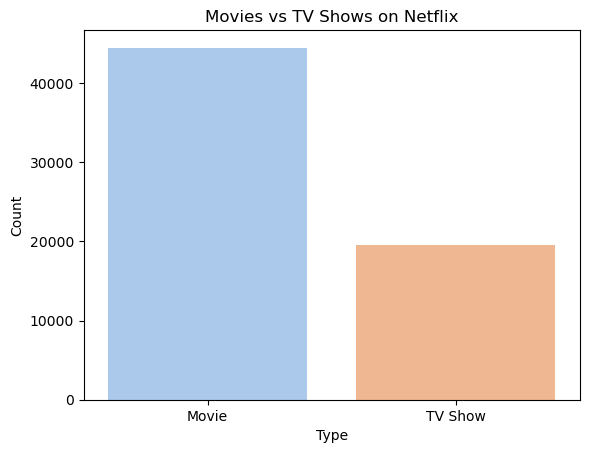

In [33]:
sns.countplot(data=df3, x='type', palette='pastel')
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

**Movies Dominate**: Netflix has significantly more movies than TV shows, indicating a focus on shorter content.

**TV Shows Have Growth Potential**: Given the popularity of binge-watching, Netflix could expand its TV show library.

**User Engagement Strategy**: More TV shows can increase retention as they keep users subscribed for longer.

**Content Balance**: Netflix might need to balance its content mix based on audience demand trends.

### Ratings Distribution

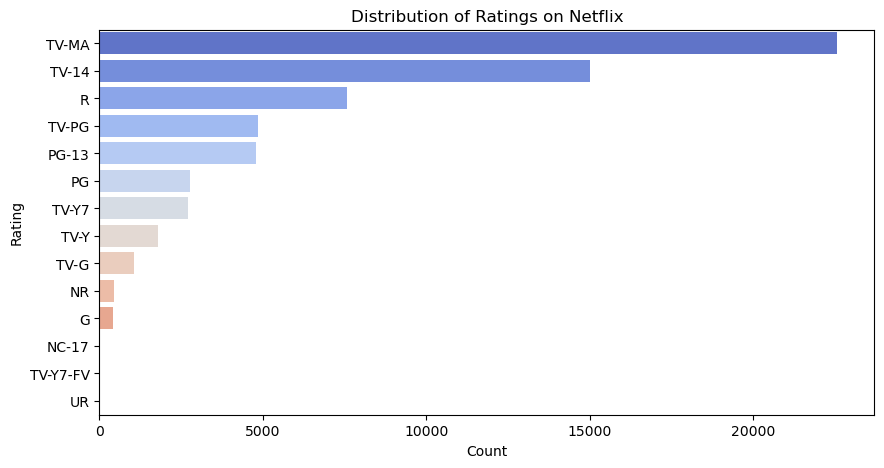

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df3, y='rating', order=df3['rating'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

- **Netflix's content is heavily skewed towards mature audiences** (TV-MA & TV-14 dominate).  
- **Limited children's content** suggests potential for growth in family-friendly programming.

### Most Popular Genres

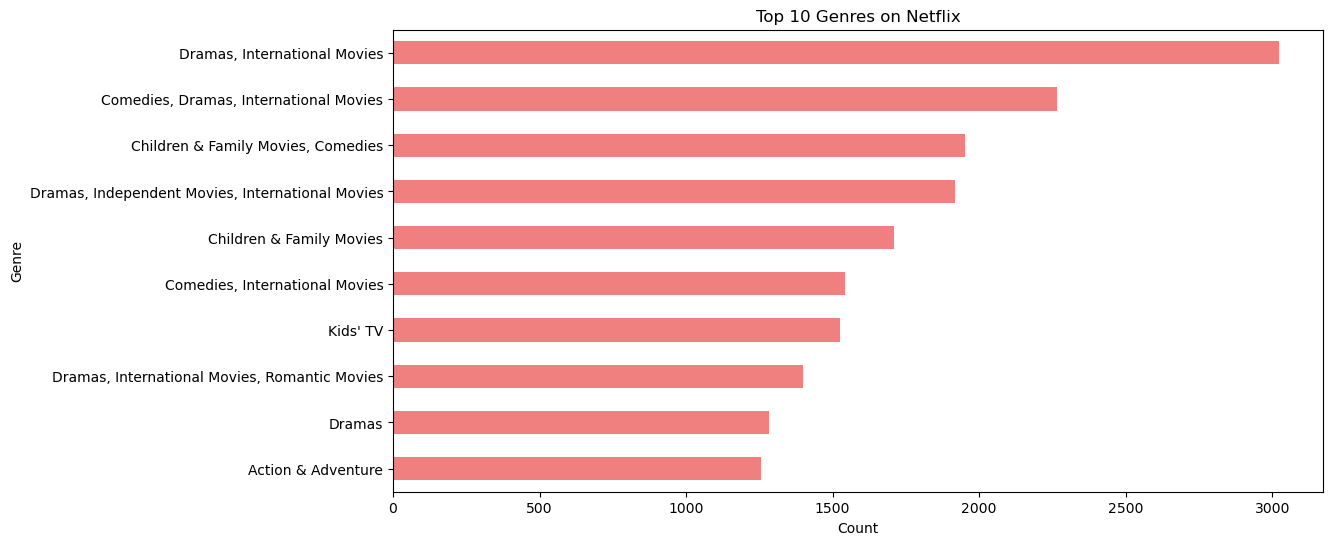

In [35]:
plt.figure(figsize=(12,6))
df3['listed_in'].value_counts().head(10).plot(kind='barh', color='lightcoral')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.gca().invert_yaxis()
plt.show()

- **Top genres:** Dramas, Comedies, and International Movies dominate Netflix's content.  
- **Family-friendly content:** Children & Family Movies have a strong presence, indicating high demand.  
- **Diverse storytelling:** Genres often combine multiple elements (e.g., Drama + International Movies).  
- **Action & Adventure:** Less frequent compared to other genres, presenting an opportunity for growth.

### Genre Trends Over Time (Movies vs. TV Shows)

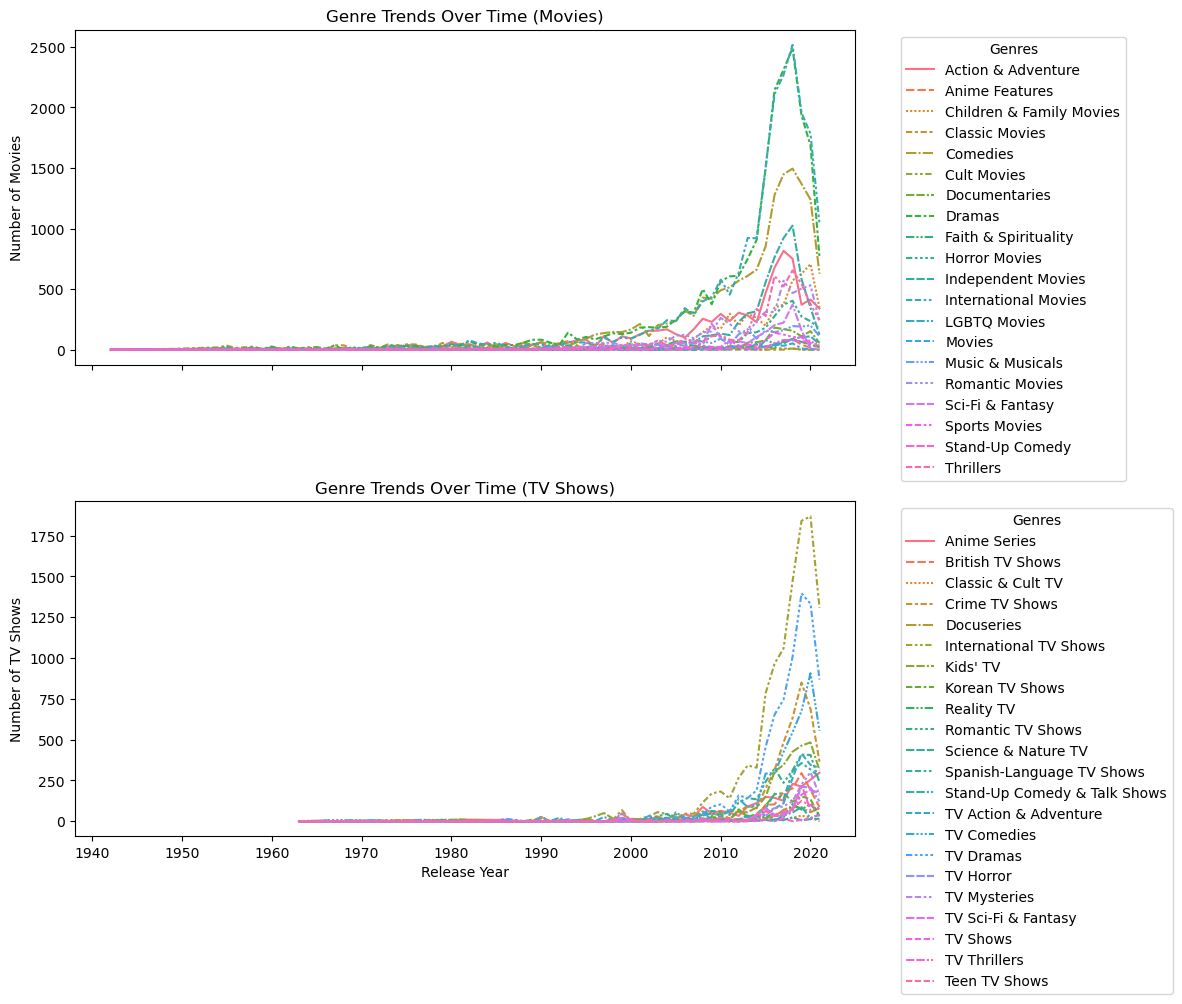

In [36]:
movies_df = df3[df3['type'] == 'Movie'][['release_year', 'listed_in']].copy()
tv_shows_df = df3[df3['type'] == 'TV Show'][['release_year', 'listed_in']].copy()

def process_genre_trend(df):
    df = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')
    return df.groupby(['release_year', 'listed_in']).size().reset_index(name='count')
    
movies_trend = process_genre_trend(movies_df)
tv_shows_trend = process_genre_trend(tv_shows_df)

movies_pivot = movies_trend.pivot(index='release_year', columns='listed_in', values='count').fillna(0)
tv_shows_pivot = tv_shows_trend.pivot(index='release_year', columns='listed_in', values='count').fillna(0)

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Movies Genre Trend
sns.lineplot(data=movies_pivot, ax=axes[0])
axes[0].set_title("Genre Trends Over Time (Movies)")
axes[0].set_ylabel("Number of Movies")
axes[0].legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')

# TV Shows Genre Trend
sns.lineplot(data=tv_shows_pivot, ax=axes[1])
axes[1].set_title("Genre Trends Over Time (TV Shows)")
axes[1].set_xlabel("Release Year")
axes[1].set_ylabel("Number of TV Shows")
axes[1].legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Movies:**  
- **Dramas, Action, Comedies, and Documentaries** saw the highest growth, especially post-2010.  
- **Horror & Sci-Fi** gained traction but remain secondary.  
- **Romantic & Music-based movies** have seen steady but limited growth.  

**TV Shows:**  
- **Reality TV, Dramas, and International TV** have surged in recent years.  
- **Korean & Anime series** are growing rapidly, reflecting rising global demand.  
- **Crime & Thriller shows** have gained momentum post-2015.  

### Genre Co-Occurrence

In [37]:
df_genres = df3.assign(listed_in=df3['listed_in'].str.split(', ')).explode('listed_in')
genre_pivot = df_genres.pivot_table(index=df_genres.index, columns='listed_in', aggfunc='size', fill_value=0)
genre_co_occurrence = genre_pivot.T.dot(genre_pivot)


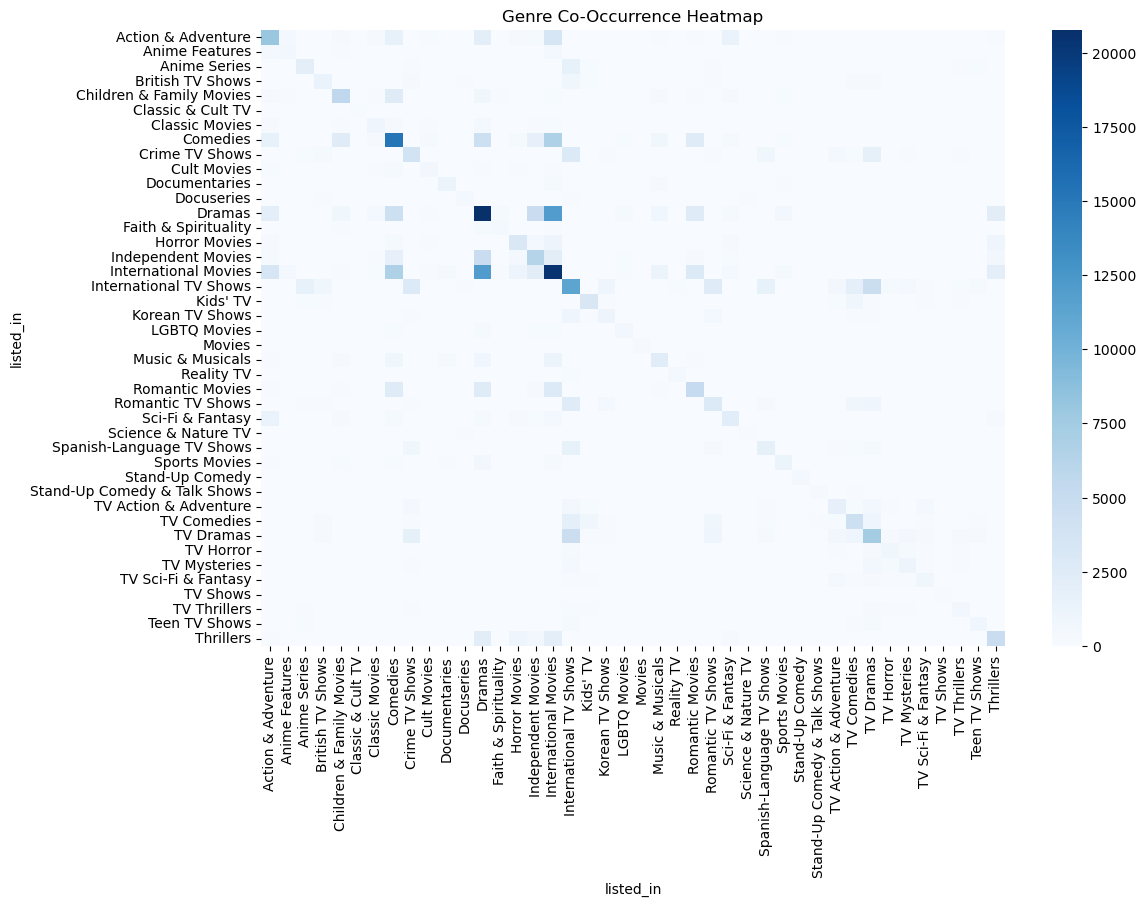

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(genre_co_occurrence, cmap="Blues", annot=False)
plt.title("Genre Co-Occurrence Heatmap")
plt.show()


### **Genre Co-Occurrence Insights**  

**Strong Genre Pairings (High Co-Occurrence)**  
- **Dramas & International Movies** → Global emotional storytelling is popular.  
- **Crime TV Shows & TV Dramas** → Crime narratives often include drama elements.  
- **Sci-Fi & Fantasy with TV Thrillers** → Thrillers enhance fantasy storytelling.  

**Rarely Paired Genres (Low or No Co-Occurrence)**  
- **Stand-Up Comedy vs. Horror Movies** → Different audience preferences.  
- **Faith & Spirituality vs. Sci-Fi & Fantasy** → Distinct viewer interests.
  
**Business Recommendations**  
- **Expand** high-performing genre pairings (**Dramas + Crime, Thriller, International Movies**).  
- **Experiment** with unique combinations (**Sci-Fi Comedy, Thriller Comedy**).  
- **Use regional insights** to tailor content (**Korean TV Shows + Romance** trend).  

### Duration Distribution for Movies

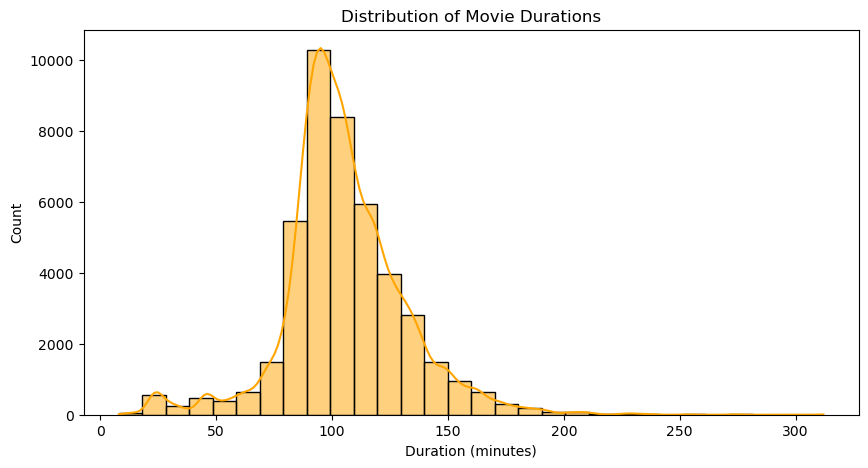

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(df3[df3['type'] == 'Movie']['duration_min'], bins=30, kde=True, color='orange')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()


Most Netflix movies are **90-120 minutes long**, aligning with industry standards. **Short films (~30-60 min)** and **very long movies (150+ min)** are rare. Netflix should focus on the **90-120 min range** while exploring short films for niche audiences.

### Content Added Over the Years

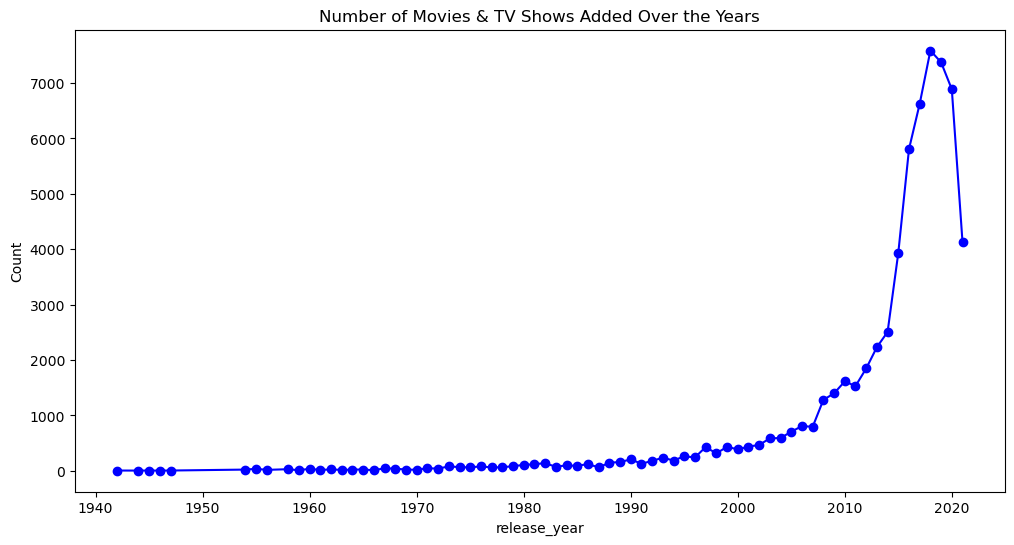

In [40]:
plt.figure(figsize=(12,6))
df3['release_year'].value_counts().sort_index().plot(kind='line', marker='o', color='blue')
plt.title("Number of Movies & TV Shows Added Over the Years")
plt.xlabel("release_year")
plt.ylabel("Count")
plt.show()


- **Explosive growth post-2010:** Netflix significantly ramped up content production and acquisitions after 2010, with a sharp peak around 2019-2020.  
- **Recent decline:** There is a noticeable drop in content additions after the peak, possibly due to strategic shifts, content saturation, or external factors like the pandemic.

### Content Distribution by Country & Genre

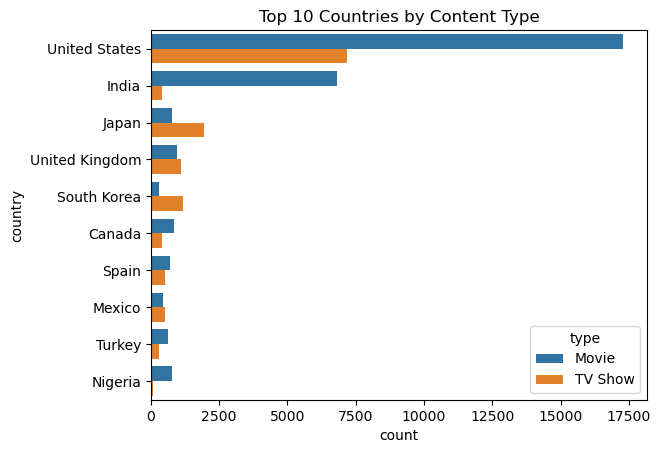

In [41]:
top_countries = df3['country'].value_counts().head(10).index
sns.countplot(data=df3[df3['country'].isin(top_countries)], y='country', hue='type', order=top_countries)
plt.title("Top 10 Countries by Content Type")
plt.show()


- The **United States** dominates Netflix’s content production, contributing the most Movies and TV Shows. 
- **India** follows as the second-largest producer, mainly focusing on Movies.
- Other key contributors include **Japan, South Korea, and the UK**, known for strong TV Show production.
- Meanwhile, **Canada, Spain, Mexico, Turkey, and Nigeria** contribute smaller but growing amounts.
- Overall, **TV Shows are concentrated in a few countries, while Movies have a broader global presence.**

### Best Time to Release a TV Show

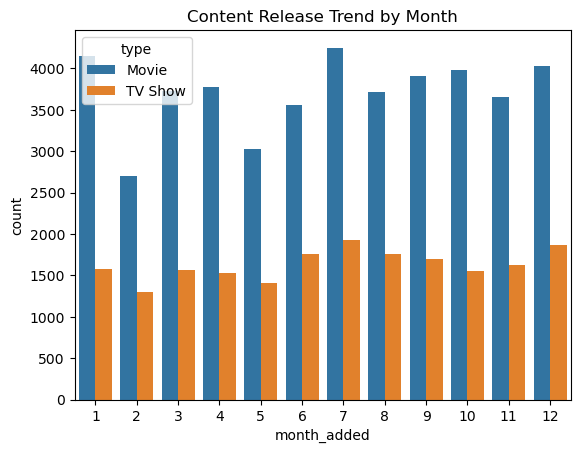

In [42]:
df3['month_added'] = df3['date_added'].dt.month
sns.countplot(data=df3, x='month_added', hue='type')
plt.title("Content Release Trend by Month")
plt.show()


- **Consistent content releases throughout the year** with slight peaks in mid-year and December.  
- **Movies dominate over TV shows** in every month, suggesting a stronger focus on films.

### Actor & Director Analysis

In [43]:
top_actors = df3['cast'].value_counts().head(10)
top_directors = df3['director'].value_counts().head(10)

## Top 10 Actors

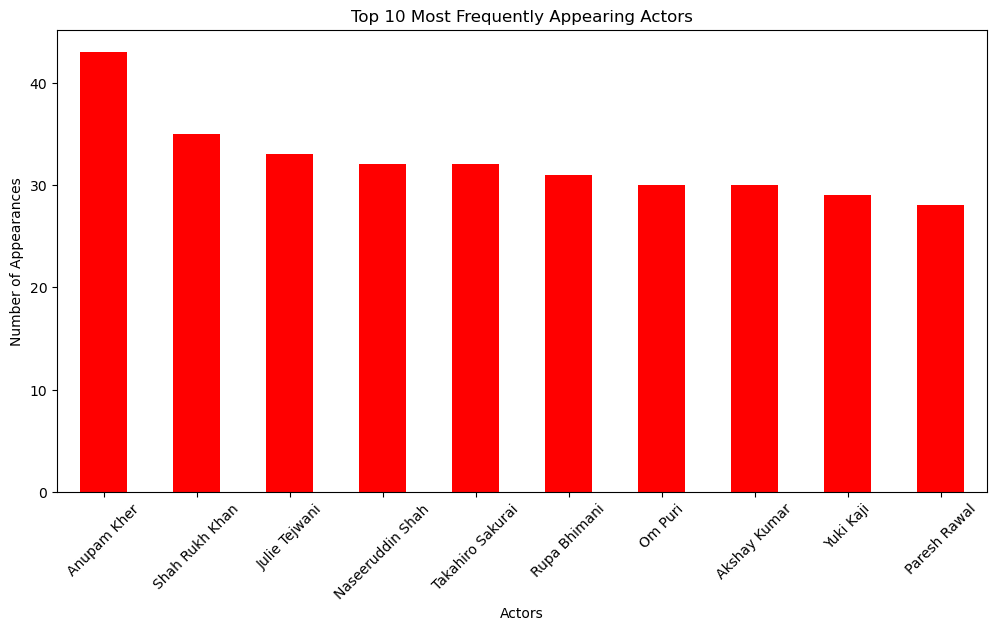

In [44]:
plt.figure(figsize=(12, 6))
top_actors.plot(kind='bar', color='red')
plt.xlabel("Actors")
plt.ylabel("Number of Appearances")
plt.title("Top 10 Most Frequently Appearing Actors")
plt.xticks(rotation=45)
plt.show()


- **Anupam Kher leads** as the most frequently appearing actor on Netflix.  
- **Bollywood dominates**, with actors like Shah Rukh Khan, Naseeruddin Shah, Om Puri, and Akshay Kumar featuring prominently.  
- **International presence** includes Takahiro Sakurai and Yuki Kaji, indicating Netflix's diverse content offerings.  

## Top 10 Directors

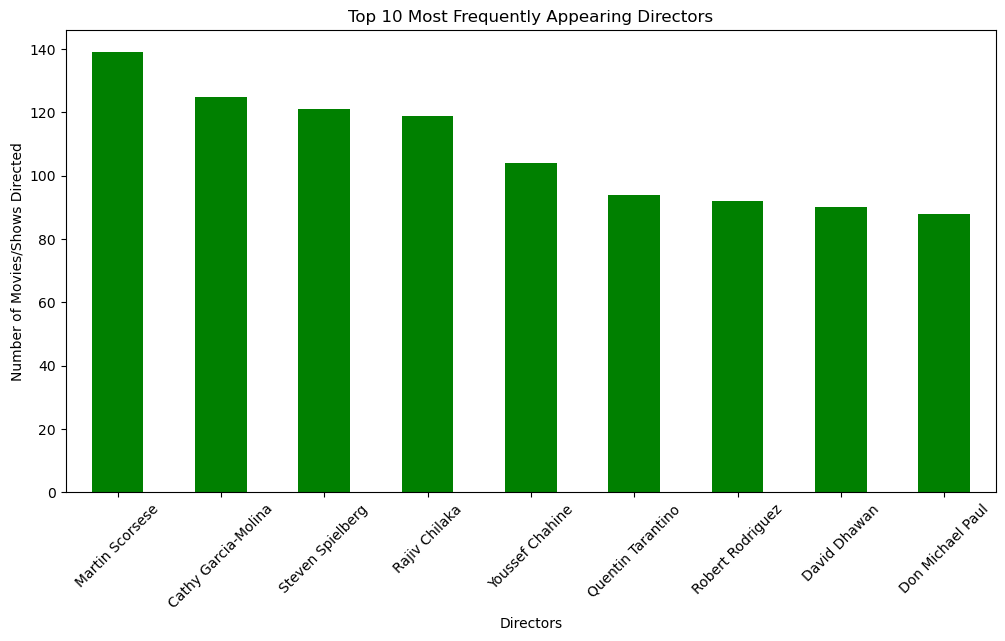

In [45]:
filtered_directors = top_directors[top_directors.index != "Unknown"]

plt.figure(figsize=(12, 6))
filtered_directors.plot(kind='bar', color='green')
plt.xlabel("Directors")
plt.ylabel("Number of Movies/Shows Directed")
plt.title("Top 10 Most Frequently Appearing Directors")
plt.xticks(rotation=45)
plt.show()


- **Martin Scorsese leads** as the most frequently appearing director on Netflix.  
- **Renowned Hollywood directors** like Steven Spielberg, Quentin Tarantino, and Robert Rodriguez have strong representation.  
- **Cathy Garcia-Molina and Rajiv Chilaka** highlight Netflix's focus on regional and animated content.  
- **Diverse directorial styles**, from blockbuster filmmaking to niche genres, show Netflix’s broad content strategy.  
- **Bollywood's presence**, with directors like David Dhawan, suggests strong Indian market engagement.

### **Netflix EDA - Key Insights & Recommendation**  

1. **Content Growth Trends**  
   - Sharp rise in content additions from 2010-2020, peaking in 2020, followed by a decline.  
   - Suggests a shift from volume-based to quality-focused content strategy.  

2. **Movie vs. TV Show Distribution**  
   - Movies dominate Netflix, but TV Shows have seen consistent growth.  
   - Expanding high-quality TV series can improve retention.  

3. **Genre & Audience Preferences**  
   - Drama, Comedy, and Action are top genres; Horror & Sci-Fi are underrepresented.  
   - Increasing niche genre content can attract new subscriber segments.  

4. **Regional Expansion**  
   - USA leads in content, but global markets (India, UK) are growing.  
   - More investment in localized content can drive international growth.  

5. **Seasonal & Rating Trends**  
   - Year-end spikes in content releases align with higher viewership periods.  
   - Majority of content is TV-MA & TV-14, catering to mature audiences.  

### **Business Recommendation**  
- **Diversify Content Strategy:** Invest in high-quality TV shows and underrepresented genres (e.g., Sci-Fi, Horror).  
- **Strengthen Global Presence:** Expand regional content production to capture international markets.  
- **Optimize Release Strategy:** Focus on peak seasons to maximize engagement and subscriber retention.  